## Unsupervised Transformations of Data:
    -  Principle Component Analysis (PCA)
    -  Non-negative Matrix Factorization (NMF)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import fetch_lfw_people
#people = fetch_lfw_people()

In [3]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [4]:
people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
people['images'].shape

(3023, 87, 65)

In [6]:
X=pd.DataFrame(people['data'])
y=pd.DataFrame(people['target'], columns=["image"])
df=pd.concat([y,X], axis=1)

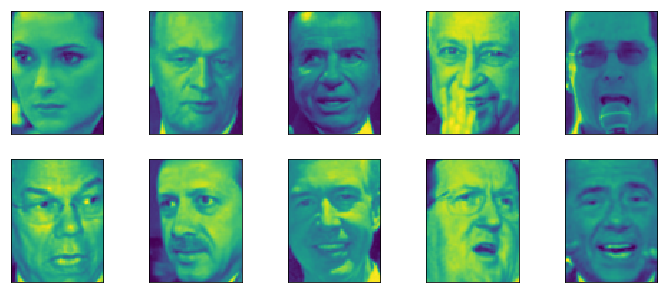

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5)) 

for ax, i in zip(axes.ravel(), np.arange(0, 10)):   
    ax.matshow(np.array(X)[i,:].reshape(87,65))
    ax.set_xticks([])
    ax.set_yticks([])

In [8]:
# Re-scaling of data:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=MinMaxScaler().fit(X)
X_scaled=scaler.transform(X)

In [9]:
X.shape

(3023, 5655)

In [10]:
# PCA: ___________________________________________________________________
from sklearn.decomposition import PCA 

pca=PCA(n_components=100, whiten=True, random_state=42)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)

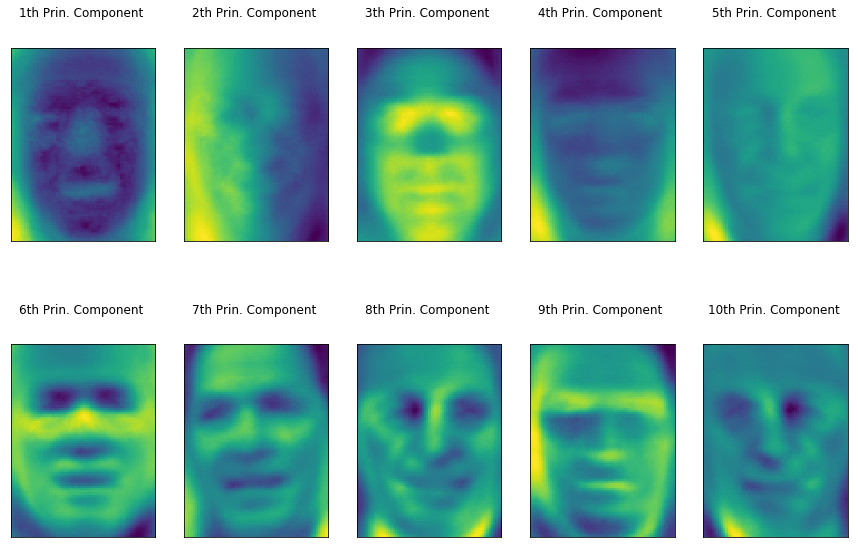

In [11]:
eigen_vectors=pca.components_[0:10]

fix, axes = plt.subplots(2, 5, figsize=(15, 10), subplot_kw={'xticks': (), 'yticks': ()}) 
for i, (component, ax) in enumerate(zip(pca.components_[0:10], axes.ravel())):    
    ax.matshow(eigen_vectors[i,:].reshape(87, 65),  cmap='viridis')    
    ax.set_title("{}th Prin. Component \n".format((i + 1))) 
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout

In [12]:
X_back_scaled=pca.inverse_transform(X_pca)
X_back=scaler.inverse_transform(X_back_scaled)

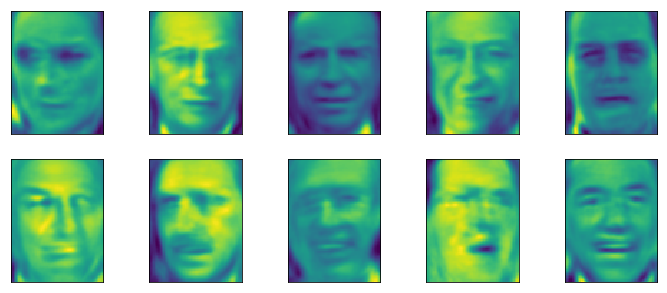

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5)) 

for ax, i in zip(axes.ravel(), np.arange(0, 10)):   
    ax.matshow(np.array(X_back)[i,:].reshape(87,65))
    ax.set_xticks([])
    ax.set_yticks([])

In [14]:
# NMF: _________________________________________________________________
from sklearn.decomposition import NMF 
nmf = NMF(n_components=20, random_state=42) 

# use fit_transform instead of fit, as TSNE has no transform method 
X_nmf = nmf.fit_transform(X_scaled)

In [15]:
X_nmf.shape

(3023, 20)

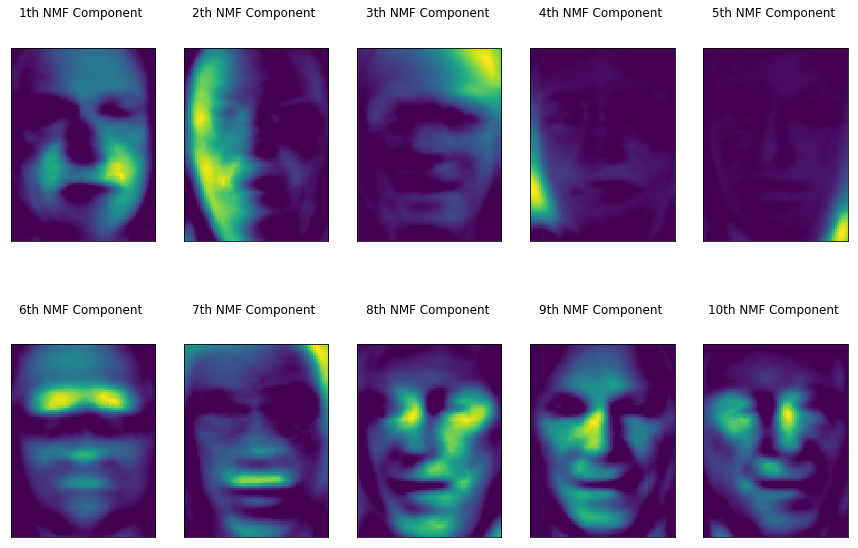

In [16]:
eigen_vectors=nmf.components_[0:10]

fix, axes = plt.subplots(2, 5, figsize=(15, 10), subplot_kw={'xticks': (), 'yticks': ()}) 
for i, (component, ax) in enumerate(zip(eigen_vectors, axes.ravel())):    
    ax.matshow(eigen_vectors[i,:].reshape(87, 65),  cmap='viridis')    
    ax.set_title("{}th NMF Component \n".format((i + 1))) 
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout

In [17]:
X_back_scaled=nmf.inverse_transform(X_nmf)
X_back=scaler.inverse_transform(X_back_scaled)

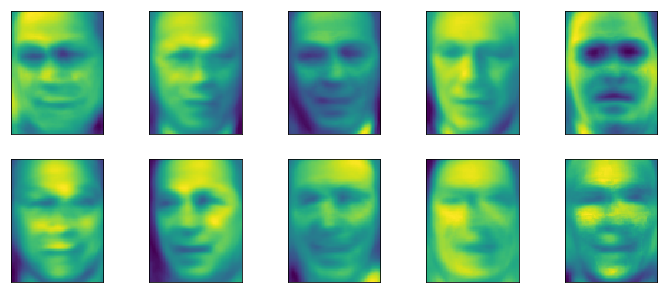

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5)) 

for ax, i in zip(axes.ravel(), np.arange(0, 10)):   
    ax.matshow(np.array(X_back)[i,:].reshape(87,65))
    ax.set_xticks([])
    ax.set_yticks([])